From my last exploration, entitled **Morphology, stellar mass and halo mass**, I found that the stellar mass fraction $f_* \equiv M_* / M_h$ varied in different ways for different types of galaxies. $f_*$ in *centrals* is determined by the galaxy mass, whereas $f_*$ in *satellites* depends on both galaxy mass and environmental density.

I show this result again in the figure below.

In [13]:
import numpy as np
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import pandas as pd
from scipy.interpolate import griddata

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

%matplotlib inline

# morphology by eye?
VISUAL_MORPHOLOGIES = False

eco_columns = ['RAdeg', 'DEdeg', 'cz', 'rMag', 'logM', 'u-r', 'u-J', 'R50', 'R90', 'M', 'FM', 
               'Grp', 'Grpcz', 'FC', 'logMh', 'Den', 'FA', 'FHI', 'FG', 'CCr', 'CCb']

df = pd.read_csv(os.path.join(root_dir, 'data', 'eco_dr1.txt'),
                 delim_whitespace=True, skiprows=56, index_col=0,
                 names=eco_columns)

if VISUAL_MORPHOLOGIES:
    df = df[df.FM == 2] 

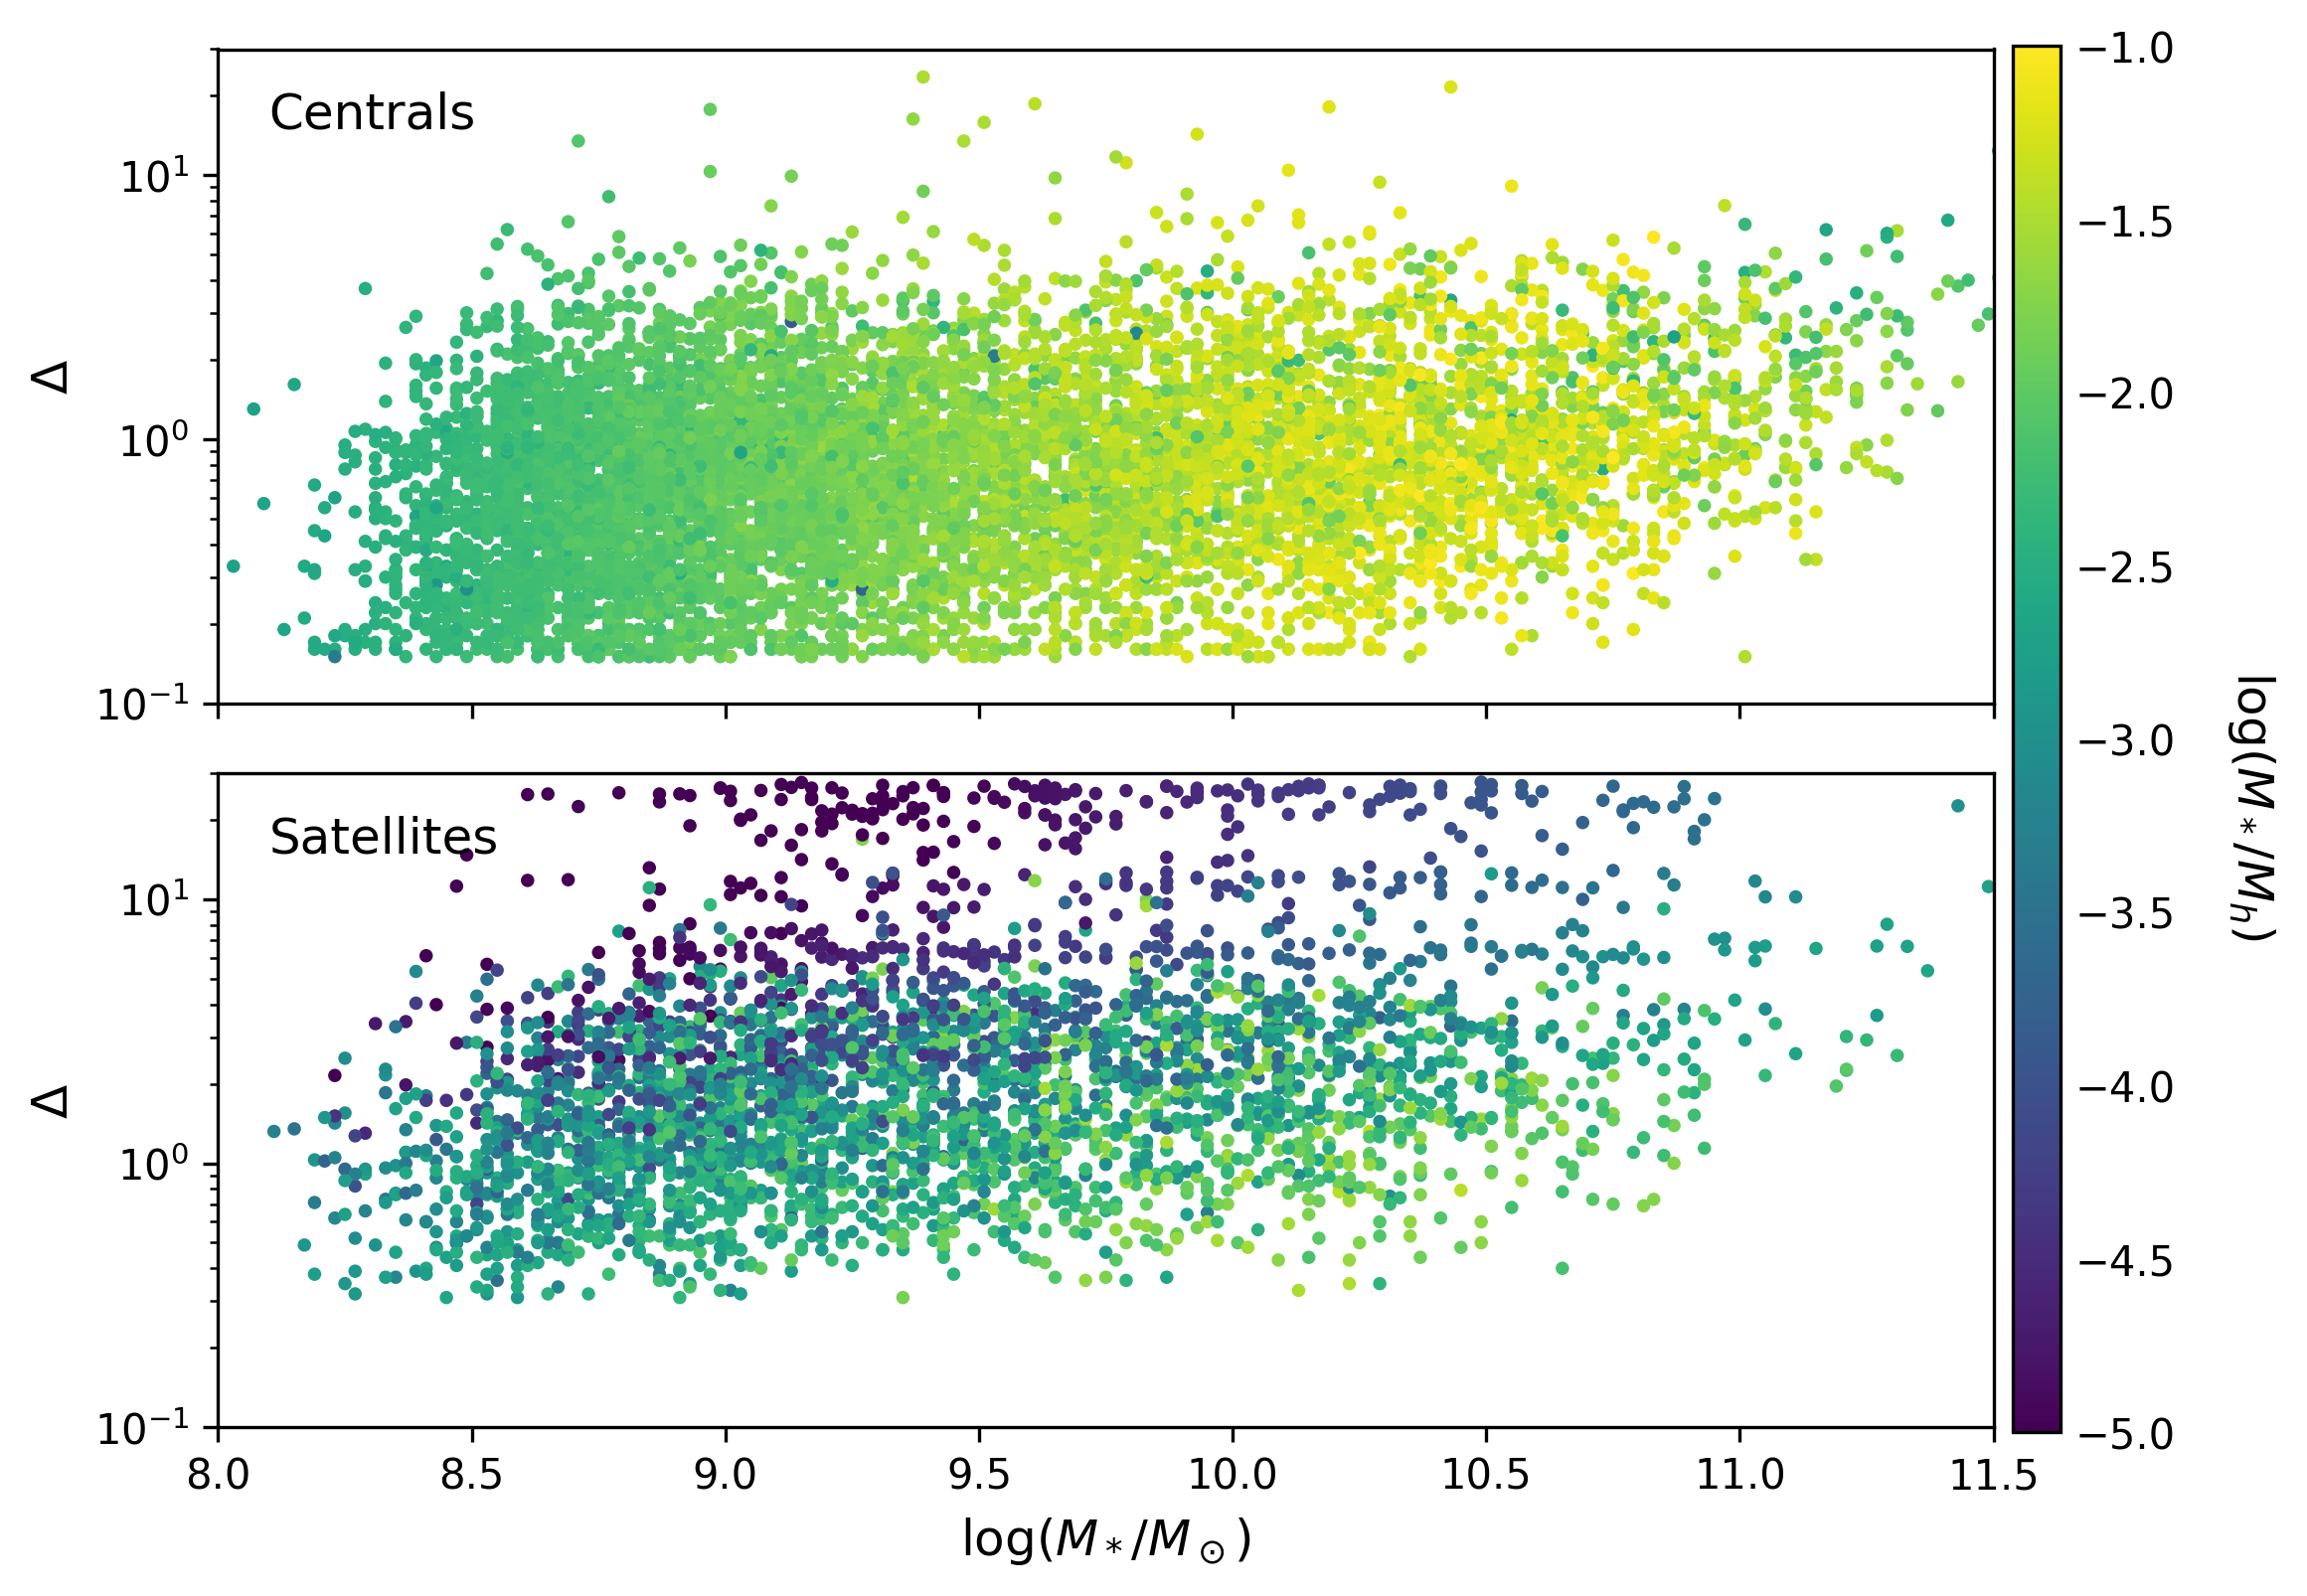

In [28]:
df_clean = df[(df.M != '-') & (10 > df['u-J']) & (df['u-J'] > -10) & (df['Den'] > 0)].copy()
df_clean['log_stellar_fraction'] = df_clean.logM - df_clean.logMh

fig = plt.figure(figsize=(8, 6), dpi=300)

fig, axes = plt.subplots(2, 1, figsize=(8, 6), dpi=300, sharex=True, squeeze=True)
for ax, cen in zip(axes.flat, [1, 0]):
    gals = df_clean[df_clean.FC == cen]
    label = 'Centrals' if cen == 1 else 'Satellites'
    
    im = ax.scatter(x='logM', y='Den', data=gals, s=5., c='log_stellar_fraction', 
                    cmap=matplotlib.cm.viridis, vmin=-5, vmax=-1)
    
    ax.set_ylabel('$\Delta$', size=12)
    ax.set_yscale('log')
    ax.set_xlim(8, 11.5)
    ax.set_ylim(0.1, 30)
    
    ax.text(8.1, 15., label, size=12, ha='left')
    
ax.set_xlim(8, 11.5)
ax.set_xlabel('log($M_*/M_\odot$)', size=12)

fig.tight_layout(h_pad=1., rect=[0.05, 0.05, 0.93, 0.95]);

cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.775])
fig.colorbar(im, cax=cbar_ax)

cbar_ax.tick_params(which='both', axis='both', length=0)
fig.text(1.0, 0.5, 'log$(M_*/M_h)$', fontsize=12, rotation=270, va='center', ha='center');

#### Some questions that I'm wondering:
1. Are density, stellar mass, and central/satellite labels calculated in *independent* ways?
2. Why does $f_*$ peak at $\log M_*/M_\odot \sim 10$? Is this the same reason why star formation appears to be most *efficient* at $\log M_h/M_\odot \sim 11.5-12$?
3. What are the astrophysics that might cause satellites, but not centrals, to vary $f_*$ as a function of environmental density?

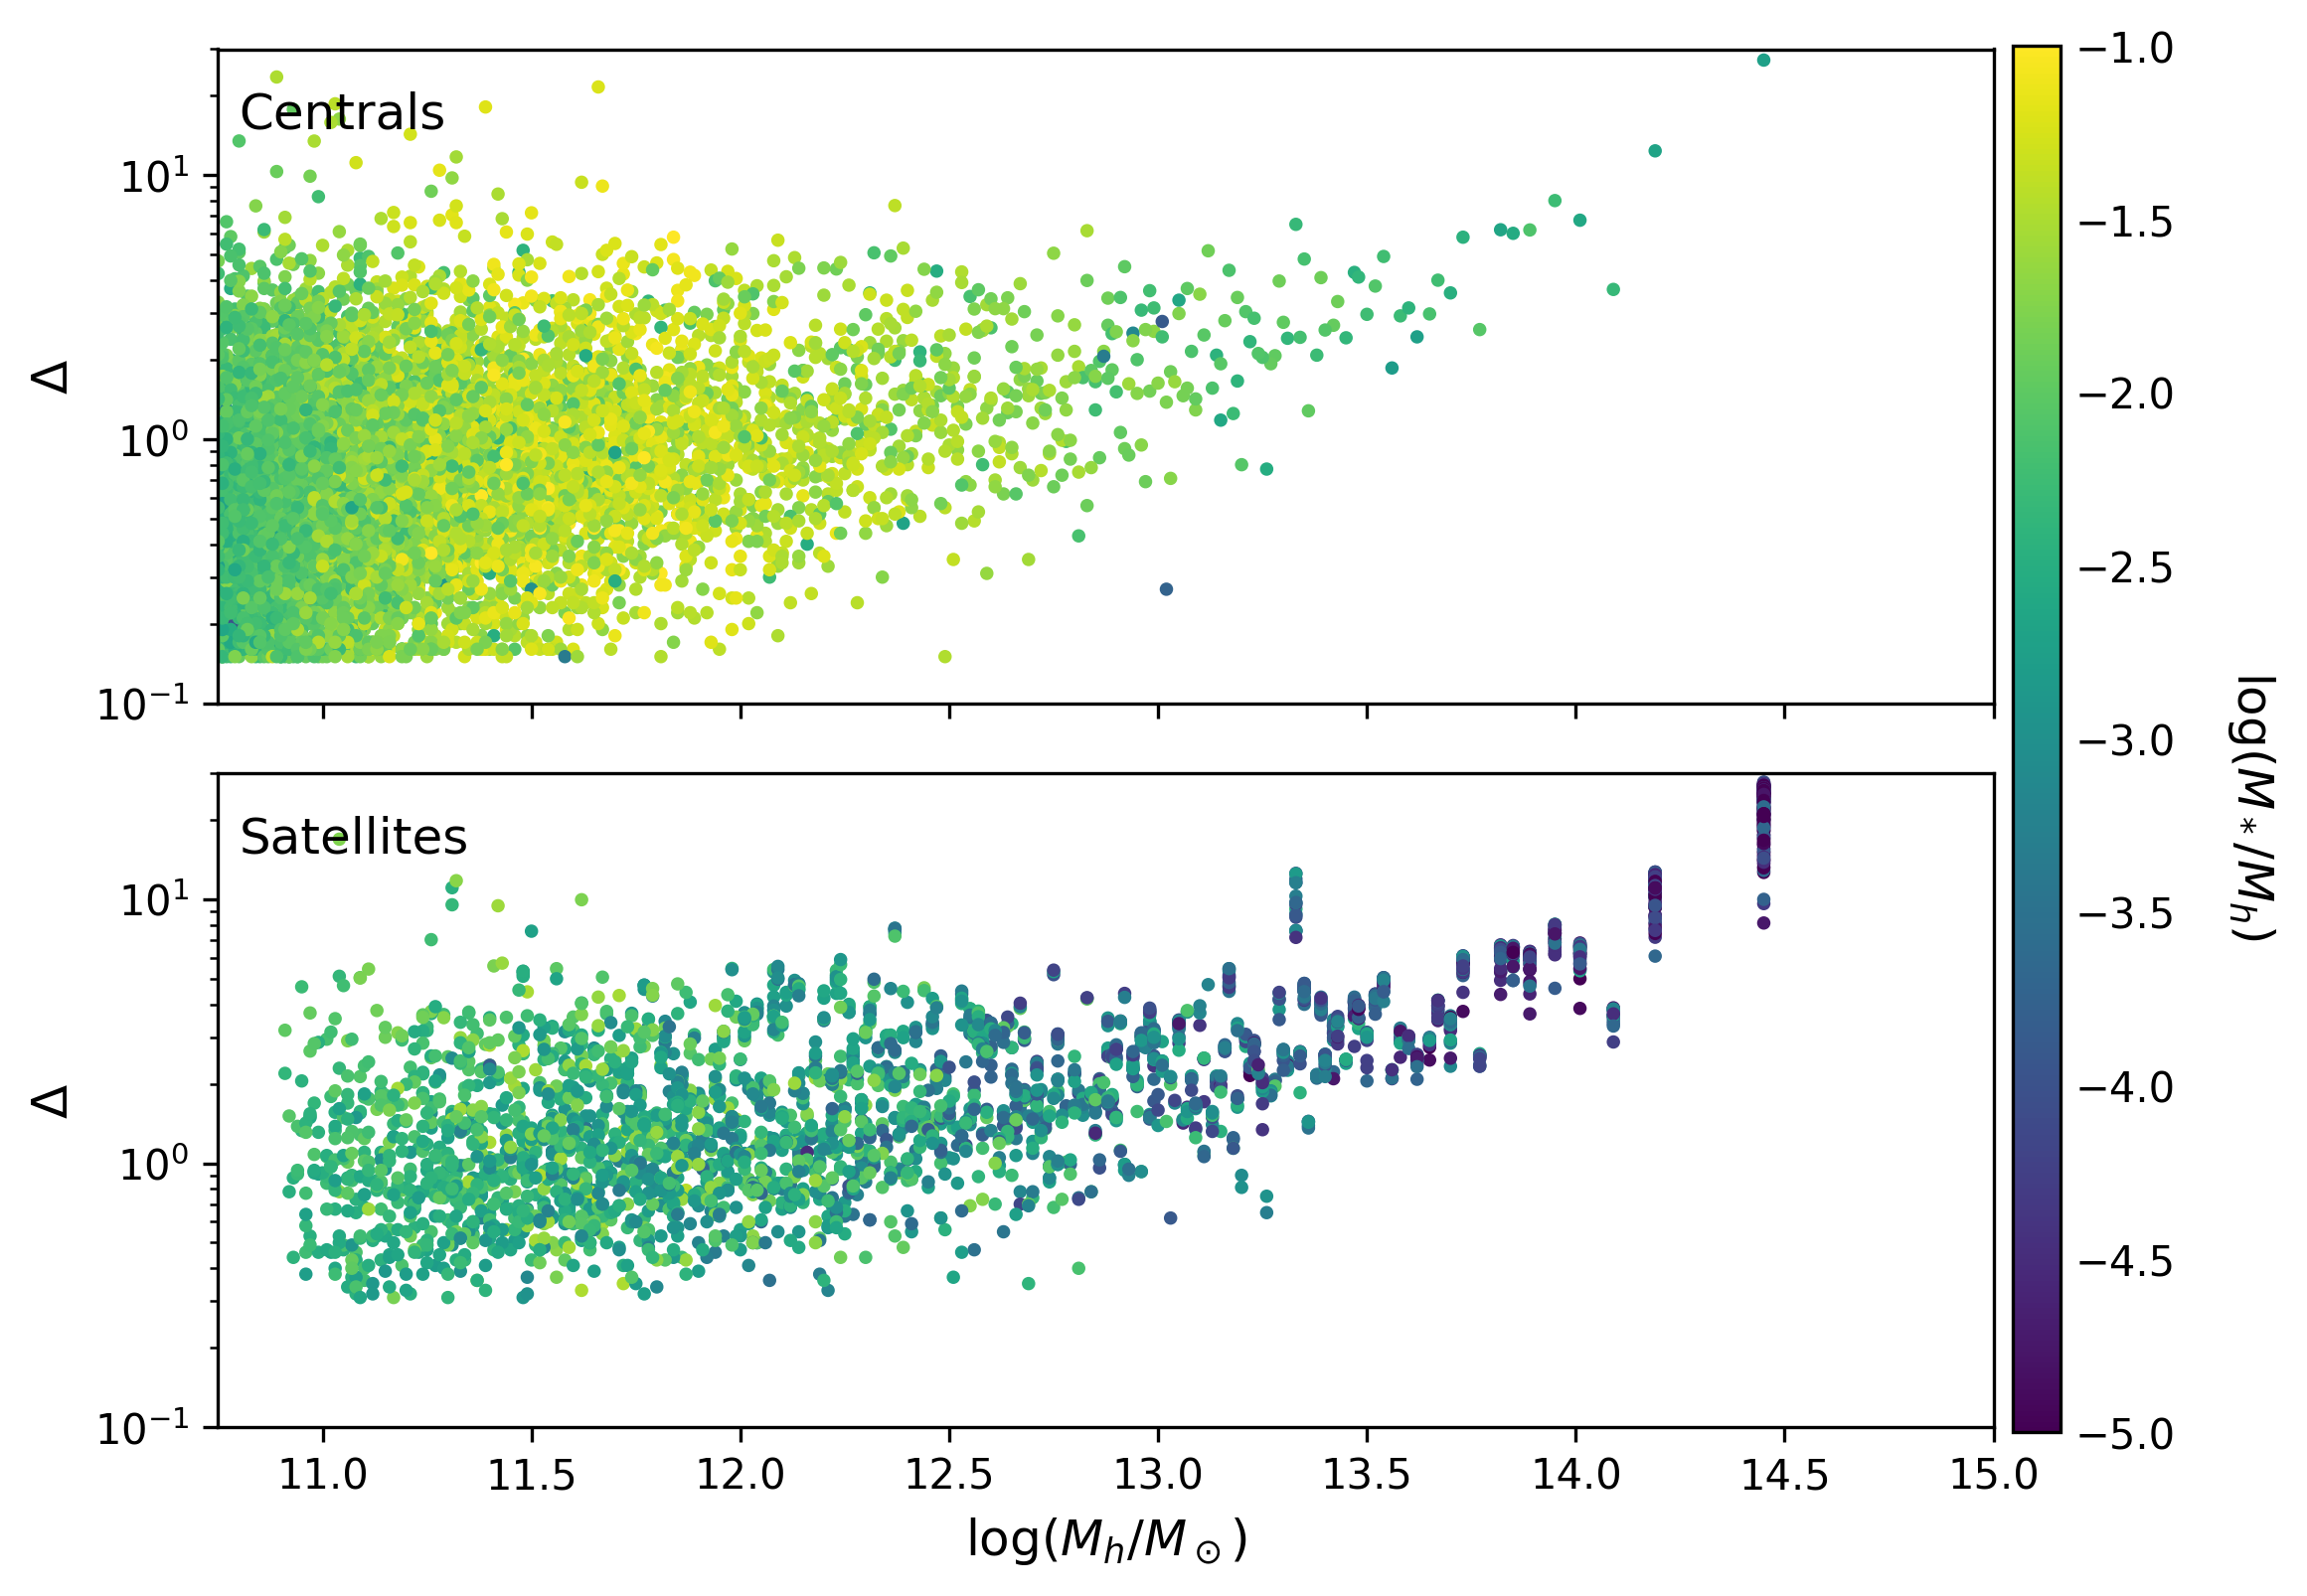

In [32]:
df_clean = df[(df.M != '-') & (10 > df['u-J']) & (df['u-J'] > -10) & (df['Den'] > 0)].copy()
df_clean['log_stellar_fraction'] = df_clean.logM - df_clean.logMh

fig = plt.figure(figsize=(8, 6), dpi=300)

fig, axes = plt.subplots(2, 1, figsize=(8, 6), dpi=300, sharex=True, squeeze=True)
for ax, cen in zip(axes.flat, [1, 0]):
    gals = df_clean[df_clean.FC == cen]
    label = 'Centrals' if cen == 1 else 'Satellites'
    
    im = ax.scatter(x='logMh', y='Den', data=gals, s=5., c='log_stellar_fraction', 
                    cmap=matplotlib.cm.viridis, vmin=-5, vmax=-1)
    
    ax.set_ylabel('$\Delta$', size=12)
    ax.set_yscale('log')
    ax.set_xlim(10.75, 15)
    ax.set_ylim(0.1, 30)
    
    ax.text(10.8, 15., label, size=12, ha='left')
    
ax.set_xlabel('log($M_h/M_\odot$)', size=12)

fig.tight_layout(h_pad=1., rect=[0.05, 0.05, 0.93, 0.95]);

cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.775])
fig.colorbar(im, cax=cbar_ax)

cbar_ax.tick_params(which='both', axis='both', length=0)
fig.text(1.0, 0.5, 'log$(M_*/M_h)$', fontsize=12, rotation=270, va='center', ha='center');